# SINDY Demo - Sparse Identification of Non-linear Dynamic Systems  

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def sequentialThresholdedLeastSquares(theta, dXdt, maxIter=10, tol=1e-1):
    Xi = np.linalg.lstsq(theta, dXdt, rcond=None)[0]
    for i in range(maxIter):
        smallindices = abs(Xi) < tol
        Xi[smallindices] = 0
        for j in range(len(dXdt[1])):           # each column in dXdt
            bigindices = ~smallindices[:, j]
            Xi[bigindices, j] = np.linalg.lstsq(theta[:, bigindices], 
                                                dXdt[:, j], 
                                                rcond=None)[0]
    return Xi

In [36]:
# snapshot sampling
t = np.linspace(0, 2 * np.pi, 5)
t = np.expand_dims(t, axis=1)
x1 = np.sin(t) + np.cos(t)
x2 = np.cos(t)
dx1dt = np.cos(t) - np.sin(t)
dx2dt = -np.sin(t)

# time history collection
X = np.concatenate((x1, x2), axis=1)
dXdt = np.concatenate((dx1dt, dx2dt), axis=1)


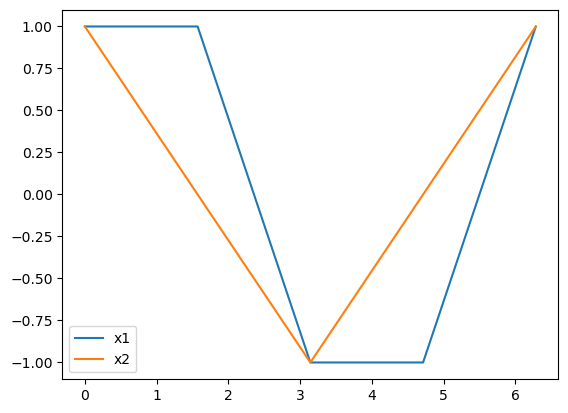

In [37]:
plt.plot(t, x1, label='x1')
plt.plot(t, x2, label='x2')
plt.legend()

In [65]:
# hyperparameters
tol = 1e-2
maxIter = 2

# library of candidate functions
theta = lambda X: np.transpose(np.array([
                            X[0] * 0 + 1,
                            X[0], 
                            X[1],
                            X[0] ** 2,
                            X[1] ** 2,
                            X[0] * X[1]]))

# solving the SINDy system
Xi = sequentialThresholdedLeastSquares(theta(np.transpose(X)), dXdt, maxIter, tol)

print("  x1. x2.")
print(Xi)

  x1. x2.
[[ 0.  0.]
 [-1. -1.]
 [ 2.  1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
